### Imports

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.inspection import permutation_importance
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from tpot import TPOTClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier


#### Loading the data

In [451]:
df_train = pd.read_csv("Data/train.csv")
pd.set_option('display.max_columns', None)
print(df_train.shape)

(15120, 56)


#### EDA

In [452]:
#profile = ProfileReport(df_train, title="Pandas Profiling Report")
#profile

In [453]:
df_train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

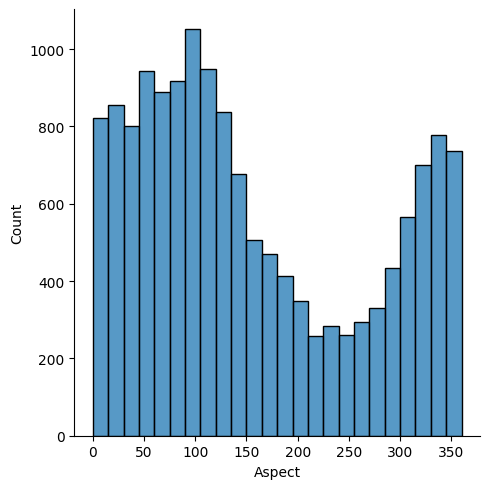

In [454]:
sns.displot(df_train["Aspect"])
plt.show()

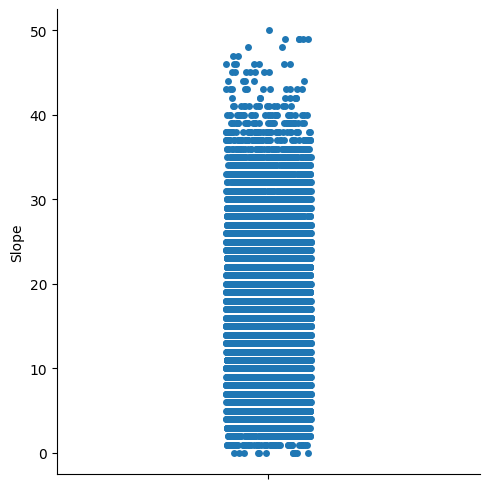

In [455]:
sns.catplot(df_train["Slope"])
plt.show()

In [456]:
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,1527.357804,0.235979,0.037632,0.416799,0.30959,0.022421,0.041468,0.066534,0.055489,0.011971,0.044907,0.000066,0.000132,0.000265,0.138624,0.024868,0.017196,0.033929,0.011442,0.0,0.007011,0.042328,0.002910,0.003505,0.00873,0.000661,0.021958,0.049074,0.017526,0.000397,0.003175,0.000529,0.000463,0.086508,0.048677,0.020106,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,1116.636997,0.424623,0.190312,0.493045,0.46234,0.148052,0.199377,0.249222,0.228941,0.108758,0.207108,0.008133,0.011501,0.016263,0.345566,0.155727,0.130005,0.181051,0.106356,0.0,0.083438,0.201343,0.053868,0.059104,0.09303,0.025710,0.146550,0.216030,0.131227,0.019917,0.056256,0.022997,0.021512,0.281122,0.215200,0.140367,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,750.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,1266.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [457]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,842,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,1248,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,2673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Feature Engineering 

In [458]:
# Create a new feature for total distance to hydrology
df_train["Total_Distance_To_Hydrology"] = np.sqrt(df_train["Horizontal_Distance_To_Hydrology"]**2 + df_train["Vertical_Distance_To_Hydrology"]**2)
# Create a new feature for mean distance to amenities
df_train["Mean_Distance_To_Amenities"] = (df_train["Horizontal_Distance_To_Hydrology"] + df_train["Horizontal_Distance_To_Roadways"])/2
# Create a new feature for total hillshade
df_train["Total_Hillshade"] =df_train["Hillshade_9am"] + df_train["Hillshade_Noon"] + df_train["Hillshade_3pm"]
# Create a new feature called "slope_aspect_interaction"
df_train["slope_aspect_interaction"] = df_train["Slope"] * df_train["Aspect"]
# Define the edges of the bins
bin_edges = range(df_train["Elevation"].min(), df_train["Elevation"].max(), int((df_train["Elevation"].max() - df_train["Elevation"].min()) / 10))
# Create a new column for the binned Elevation values
df_train["Elevation_binned"] = pd.cut(df_train["Elevation"], bins=bin_edges)

Binning the Aspect in terms of 45 degree angles

In [459]:
# Define bin edges for each 45-degree interval
bin_edges = np.array([0, 45, 90, 135, 180, 225, 270, 315, 360])
# Define bin labels for each 45-degree interval
bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
# Convert aspect to categorical feature based on bin intervals
df_train['Aspect_cat'] = pd.cut(df_train['Aspect'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [460]:
#Euclidean distance to amenities: Calculate the Euclidean distance to the nearest roadways and fire points.
df_train["Distance_To_Roadways"] = np.sqrt((df_train["Horizontal_Distance_To_Roadways"]**2) + (df_train["Vertical_Distance_To_Hydrology"]**2))
df_train["Distance_To_Fire_Points"] = np.sqrt((df_train["Horizontal_Distance_To_Fire_Points"]**2) + (df_train["Vertical_Distance_To_Hydrology"]**2))
#Average hillshade: Calculate the average hillshade value instead of the total hillshade.
df_train["Average_Hillshade"] = df_train["Total_Hillshade"] / 3
#Elevation divided by the total distance to hydrology: This feature might capture the relationship between elevation and the distance to hydrology.
#df_train["Elevation_div_Hydrology"] = df_train["Elevation"] / df_train["Total_Distance_To_Hydrology"]
#Elevation multiplied by the aspect: This feature might capture the relationship between elevation and the aspect.
df_train["Elevation_mult_Aspect"] = df_train["Elevation"] * df_train["Aspect"]
#Slope multiplied by the hillshade: This feature might capture the relationship between slope and hillshade
df_train["Slope_mult_Hillshade"] = df_train["Slope"] * df_train["Average_Hillshade"]

##### Group By Soil Type

In [461]:
#Check if soil types are mutually exclusive
soil_types = df_train.filter(regex="Soil_Type")
soil_types.sum().sum(), df_train.shape[0]
# Get the column names of the original categorical variables
original_cols = soil_types.columns

# Get the names of the new categorical variables
new_cols = [int(i[9:]) for i in soil_types.columns]

# Create a dictionary to map the original column names to the new categorical variables
mapping_dict = {col: new_col for col, new_col in zip(original_cols, new_cols)}

# Apply the mapping to the dataframe
df_train['soil_types'] = soil_types.idxmax(axis=1).map(mapping_dict)

# Drop the dummy encoded variables
#df = df.drop(original_cols, axis=1)
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Total_Distance_To_Hydrology,Mean_Distance_To_Amenities,Total_Hillshade,slope_aspect_interaction,Elevation_binned,Aspect_cat,Distance_To_Roadways,Distance_To_Fire_Points,Average_Hillshade,Elevation_mult_Aspect,Slope_mult_Hillshade,soil_types
0,242642,2881,130,22,210,54,1020,250,221,88,342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,216.831732,615.0,559,2860,"(2862, 3059]",E,1021.428412,346.236913,186.333333,374530,4099.333333,30
1,309891,3005,351,14,242,-16,1371,194,215,159,842,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,242.528349,806.5,568,4914,"(2862, 3059]",NW,1371.093359,842.152005,189.333333,1054755,2650.666667,24
2,287847,3226,63,14,618,2,1092,232,210,107,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,618.003236,855.0,549,882,"(3059, 3256]",NE,1092.001832,2018.000991,183.000000,203238,2562.000000,29
3,516307,3298,317,8,661,60,752,198,233,174,1248,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,663.717560,706.5,605,2536,"(3256, 3453]",NW,754.389820,1249.441475,201.666667,1045466,1613.333333,23
4,124860,3080,35,6,175,26,3705,219,227,144,2673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,176.920886,1940.0,590,210,"(3059, 3256]",N,3705.091227,2673.126447,196.666667,107800,1180.000000,24


In [462]:
df_train['Elevation_binned'].value_counts()

(2665, 2862]    2501
(2271, 2468]    2499
(3256, 3453]    2066
(2862, 3059]    1941
(2074, 2271]    1861
(3059, 3256]    1802
(2468, 2665]    1700
(1877, 2074]     467
(3453, 3650]     221
(3650, 3847]      58
Name: Elevation_binned, dtype: int64

In [463]:
df_train['Euclidian_Distance_To_Hydrology'] = (df_train['Horizontal_Distance_To_Hydrology']**2 + df_train['Vertical_Distance_To_Hydrology']**2)**0.5
df_train['Mean_Elevation_Vertical_Distance_Hydrology'] = (df_train['Elevation'] + df_train['Vertical_Distance_To_Hydrology'])/2
df_train['Mean_Distance_Hydrology_Firepoints'] = (df_train['Horizontal_Distance_To_Hydrology'] + df_train['Horizontal_Distance_To_Fire_Points'])/2
df_train['Mean_Distance_Hydrology_Roadways'] = (df_train['Horizontal_Distance_To_Hydrology'] + df_train['Horizontal_Distance_To_Roadways'])/2
df_train['Mean_Distance_Firepoints_Roadways'] = (df_train['Horizontal_Distance_To_Fire_Points'] + df_train['Horizontal_Distance_To_Roadways'])/2

Converting all categorical/Float columns to int 

In [464]:
# Convert 'Elevation_binned' column to its midpoint
df_train['Elevation_binned'] = df_train['Elevation_binned'].apply(lambda x: x.mid)

# One-hot encoding for the 'Aspect_cat' column
one_hot_encoder = OneHotEncoder(sparse=False)
aspect_cat_encoded = one_hot_encoder.fit_transform(df_train[['Aspect_cat']])
aspect_cat_columns = [f"Aspect_cat_{cat}" for cat in one_hot_encoder.categories_[0]]
df_aspect_cat_encoded = pd.DataFrame(aspect_cat_encoded, columns=aspect_cat_columns, index=df_train.index)
df_train = pd.concat([df_train.drop('Aspect_cat', axis=1), df_aspect_cat_encoded], axis=1)
#Convert the float columns to int
float_columns = ['Total_Distance_To_Hydrology', 'Mean_Distance_To_Amenities','Aspect_cat_E', 'Aspect_cat_N', 'Aspect_cat_NE', 'Aspect_cat_NW',
       'Aspect_cat_S', 'Aspect_cat_SE', 'Aspect_cat_SW', 'Aspect_cat_W','Distance_To_Roadways',
       'Distance_To_Fire_Points', 'Average_Hillshade','Slope_mult_Hillshade','Euclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways', 'Mean_Distance_Firepoints_Roadways']
df_train[float_columns] = df_train[float_columns].astype(int)
# Replace NaN values with median of column
df_train["Elevation_binned"] = df_train['Elevation_binned'].fillna(2763.5).astype(int)

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [465]:
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [466]:
df_train['Elevation_binned'].value_counts()

2763    2505
2369    2499
3354    2066
2960    1941
2172    1861
3157    1802
2566    1700
1975     467
3551     221
3748      58
Name: Elevation_binned, dtype: int64

In [467]:
# find which values are NaN
nan_mask = df_train['Elevation_binned'].isna()

# get the specific NaN values
nan_values = df_train.loc[nan_mask, "Elevation_binned"]

print(nan_values)

Series([], Name: Elevation_binned, dtype: int32)


In [468]:
pd.set_option('display.max_rows', None)
df_train.dtypes

Id                                            int64
Elevation                                     int64
Aspect                                        int64
Slope                                         int64
Horizontal_Distance_To_Hydrology              int64
Vertical_Distance_To_Hydrology                int64
Horizontal_Distance_To_Roadways               int64
Hillshade_9am                                 int64
Hillshade_Noon                                int64
Hillshade_3pm                                 int64
Horizontal_Distance_To_Fire_Points            int64
Wilderness_Area1                              int64
Wilderness_Area2                              int64
Wilderness_Area3                              int64
Wilderness_Area4                              int64
Soil_Type1                                    int64
Soil_Type2                                    int64
Soil_Type3                                    int64
Soil_Type4                                    int64
Soil_Type5  

Basic Checks and data splitting

In [469]:
# Check for missing values and duplicates
print(df_train.isna().sum())
print(df_train.duplicated().sum())

# Drop duplicates if necessary
df_trian = df_train.drop_duplicates()

# 2. Feature selection (using RandomForestClassifier and RFECV)
X = df_train.drop("Cover_Type", axis=1)
y = df_train["Cover_Type"]

Id                                            0
Elevation                                     0
Aspect                                        0
Slope                                         0
Horizontal_Distance_To_Hydrology              0
Vertical_Distance_To_Hydrology                0
Horizontal_Distance_To_Roadways               0
Hillshade_9am                                 0
Hillshade_Noon                                0
Hillshade_3pm                                 0
Horizontal_Distance_To_Fire_Points            0
Wilderness_Area1                              0
Wilderness_Area2                              0
Wilderness_Area3                              0
Wilderness_Area4                              0
Soil_Type1                                    0
Soil_Type2                                    0
Soil_Type3                                    0
Soil_Type4                                    0
Soil_Type5                                    0
Soil_Type6                              

In [470]:
# Using random forest classifier to select specific features. Not very useful do not run
"""""
rf = RandomForestClassifier(random_state=42)
selector = RFECV(rf, step=1, cv=5, n_jobs=-1)
selector.fit(X, y)
selected_features = X.columns[selector.support_]

# Update X with selected features
X = X[selected_features]

# 3. Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
"""""

'""\nrf = RandomForestClassifier(random_state=42)\nselector = RFECV(rf, step=1, cv=5, n_jobs=-1)\nselector.fit(X, y)\nselected_features = X.columns[selector.support_]\n\n# Update X with selected features\nX = X[selected_features]\n\n# 3. Feature scaling\nscaler = StandardScaler()\nX = scaler.fit_transform(X)\n'

Calculating feature importance through random forest and cross validation and then selecting features which have a feature importance of over .002

In [400]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Number of folds for cross-validation
n_folds = 5

# Initialize KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store feature importances from each fold
importances_folds = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    rfc.fit(X_train_cv, y_train_cv)

    # Calculate permutation importance
    result = permutation_importance(rfc, X_test_cv, y_test_cv, n_repeats=10, random_state=42)
    importances_folds.append(result.importances_mean)

# Compute the mean importance across all folds
importances_mean = np.mean(importances_folds, axis=0)

# Select features with importance above 0.002
selected_features = X.columns[importances_mean > 0.001]
print("Selected features:", selected_features)

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

Selected features: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type3', 'Soil_Type10', 'Total_Distance_To_Hydrology',
       'Mean_Distance_To_Amenities', 'Total_Hillshade',
       'slope_aspect_interaction', 'Elevation_binned', 'Distance_To_Roadways',
       'Distance_To_Fire_Points', 'Average_Hillshade', 'Elevation_mult_Aspect',
       'Slope_mult_Hillshade', 'soil_types', 'Euclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways',
       'Mean_Distance_Firepoints_Roadways'],
      dtype='object')


In [471]:
X_selected.head()
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [402]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importances and standard deviations
importances = result.importances_mean
std = result.importances_std

# Print out the feature importances
for feature, importance, std_dev in zip(X_test.columns, importances, std):
    print(f"{feature}: {importance:.3f} +/- {std_dev:.3f}")

Id: 0.057 +/- 0.003
Elevation: 0.075 +/- 0.004
Aspect: 0.002 +/- 0.001
Slope: -0.002 +/- 0.001
Horizontal_Distance_To_Hydrology: 0.004 +/- 0.002
Vertical_Distance_To_Hydrology: 0.004 +/- 0.002
Horizontal_Distance_To_Roadways: 0.004 +/- 0.002
Hillshade_9am: 0.004 +/- 0.001
Hillshade_Noon: 0.000 +/- 0.001
Hillshade_3pm: -0.000 +/- 0.002
Horizontal_Distance_To_Fire_Points: 0.004 +/- 0.002
Wilderness_Area1: 0.005 +/- 0.001
Wilderness_Area3: 0.003 +/- 0.001
Wilderness_Area4: 0.005 +/- 0.002
Soil_Type3: 0.003 +/- 0.001
Soil_Type10: 0.003 +/- 0.001
Total_Distance_To_Hydrology: 0.003 +/- 0.002
Mean_Distance_To_Amenities: 0.004 +/- 0.001
Total_Hillshade: -0.000 +/- 0.001
slope_aspect_interaction: -0.001 +/- 0.001
Elevation_binned: 0.007 +/- 0.003
Distance_To_Roadways: 0.004 +/- 0.001
Distance_To_Fire_Points: 0.003 +/- 0.001
Average_Hillshade: -0.000 +/- 0.001
Elevation_mult_Aspect: 0.001 +/- 0.001
Slope_mult_Hillshade: 0.001 +/- 0.001
soil_types: 0.051 +/- 0.004
Euclidian_Distance_To_Hydrology:

In [403]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Total_Distance_To_Hydrology,Mean_Distance_To_Amenities,Total_Hillshade,slope_aspect_interaction,Elevation_binned,Distance_To_Roadways,Distance_To_Fire_Points,Average_Hillshade,Elevation_mult_Aspect,Slope_mult_Hillshade,soil_types,Euclidian_Distance_To_Hydrology,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Hydrology_Firepoints,Mean_Distance_Hydrology_Roadways,Mean_Distance_Firepoints_Roadways,Aspect_cat_E,Aspect_cat_N,Aspect_cat_NE,Aspect_cat_NW,Aspect_cat_S,Aspect_cat_SE,Aspect_cat_SW,Aspect_cat_W
0,242642,2881,130,22,210,54,1020,250,221,88,342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,216,615,559,2860,2960,1021,346,186,374530,4099,30,216,1467,276,615,681,1,0,0,0,0,0,0,0
1,309891,3005,351,14,242,-16,1371,194,215,159,842,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,242,806,568,4914,2960,1371,842,189,1054755,2650,24,242,1494,542,806,1106,0,0,0,1,0,0,0,0
2,287847,3226,63,14,618,2,1092,232,210,107,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,618,855,549,882,3157,1092,2018,183,203238,2562,29,618,1614,1318,855,1555,0,0,1,0,0,0,0,0
3,516307,3298,317,8,661,60,752,198,233,174,1248,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,663,706,605,2536,3354,754,1249,201,1045466,1613,23,663,1679,954,706,1000,0,0,0,1,0,0,0,0
4,124860,3080,35,6,175,26,3705,219,227,144,2673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,176,1940,590,210,3157,3705,2673,196,107800,1180,24,176,1553,1424,1940,3189,0,1,0,0,0,0,0,0


In [404]:
df_train.dtypes

Id                                            int64
Elevation                                     int64
Aspect                                        int64
Slope                                         int64
Horizontal_Distance_To_Hydrology              int64
Vertical_Distance_To_Hydrology                int64
Horizontal_Distance_To_Roadways               int64
Hillshade_9am                                 int64
Hillshade_Noon                                int64
Hillshade_3pm                                 int64
Horizontal_Distance_To_Fire_Points            int64
Wilderness_Area1                              int64
Wilderness_Area2                              int64
Wilderness_Area3                              int64
Wilderness_Area4                              int64
Soil_Type1                                    int64
Soil_Type2                                    int64
Soil_Type3                                    int64
Soil_Type4                                    int64
Soil_Type5  

### PCA(Does not provide better results do not run)

In [23]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

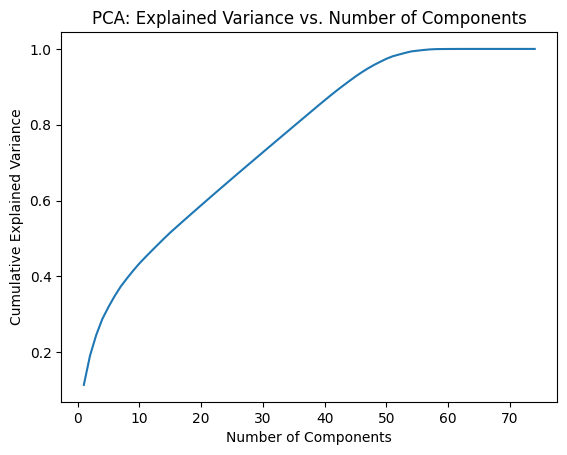

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA()

# Fit PCA on the training data
pca.fit(X_train_std)

# Plot the explained variance ratio
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Components')
plt.show()

In [25]:
# Define the optimal number of components
optimal_n_components = 52

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_n_components)
X_train_pca = pca_optimal.fit_transform(X_train_std)
X_test_pca = pca_optimal.transform(X_test_std)

In [26]:
# Retrain the RandomForestClassifier with the PCA-transformed data
rfc_pca = RandomForestClassifier(random_state=42,bootstrap=False, 
                                           criterion="entropy", 
                                           max_features=0.25, 
                                           min_samples_leaf=1, 
                                           min_samples_split=3, 
                                           n_estimators=500)
rfc_pca.fit(X_train_pca, y_train)

# Evaluate the performance of the model
train_score_pca = rfc_pca.score(X_train_pca, y_train)
test_score_pca = rfc_pca.score(X_test_pca, y_test)

print(f"PCA Train Score: {train_score_pca:.4f}")
print(f"PCA Test Score: {test_score_pca:.4f}")

PCA Train Score: 1.0000
PCA Test Score: 0.8168


### CATBOOST

In [405]:
#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
cat= CatBoostClassifier(max_depth=10,n_estimators=700,random_state=0,task_type="GPU")
cat.fit(X_train, y_train)

Learning rate set to 0.14527
0:	learn: 1.5647200	total: 40.9ms	remaining: 28.6s
1:	learn: 1.3696683	total: 81.8ms	remaining: 28.5s
2:	learn: 1.2282004	total: 121ms	remaining: 28.1s
3:	learn: 1.1240427	total: 162ms	remaining: 28.3s
4:	learn: 1.0431506	total: 203ms	remaining: 28.3s
5:	learn: 0.9742026	total: 244ms	remaining: 28.2s
6:	learn: 0.9157475	total: 281ms	remaining: 27.8s
7:	learn: 0.8649482	total: 321ms	remaining: 27.8s
8:	learn: 0.8209194	total: 365ms	remaining: 28s
9:	learn: 0.7820010	total: 405ms	remaining: 27.9s
10:	learn: 0.7488603	total: 450ms	remaining: 28.2s
11:	learn: 0.7169317	total: 491ms	remaining: 28.1s
12:	learn: 0.6914946	total: 537ms	remaining: 28.4s
13:	learn: 0.6684580	total: 579ms	remaining: 28.4s
14:	learn: 0.6455142	total: 626ms	remaining: 28.6s
15:	learn: 0.6248357	total: 665ms	remaining: 28.4s
16:	learn: 0.6063013	total: 707ms	remaining: 28.4s
17:	learn: 0.5898590	total: 751ms	remaining: 28.5s
18:	learn: 0.5760848	total: 802ms	remaining: 28.7s
19:	learn: 0

In [406]:
# Evaluate the performance of the model
train_score = cat.score(X_train, y_train)
test_score = cat.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 1.0000
Test Score: 0.8886


In [407]:
# Make predictions on the test set
y_pred = cat.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[343  57   0   0  10   0  17]
 [ 75 342   7   0  30   5   5]
 [  0   1 353  12   4  30   0]
 [  0   0   4 423   0   9   0]
 [  0   7   4   0 434   7   0]
 [  0   2  27  12   2 372   0]
 [ 10   0   0   0   0   0 420]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80       427
           2       0.84      0.74      0.78       464
           3       0.89      0.88      0.89       400
           4       0.95      0.97      0.96       436
           5       0.90      0.96      0.93       452
           6       0.88      0.90      0.89       415
           7       0.95      0.98      0.96       430

    accuracy                           0.89      3024
   macro avg       0.89      0.89      0.89      3024
weighted avg       0.89      0.89      0.89      3024



### Random Forest(Currently provides the best result)

In [408]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

clf = make_pipeline(preprocessing.StandardScaler(), 
                    RandomForestClassifier(bootstrap=False, 
                                           criterion="entropy", 
                                           max_features=0.25, 
                                           min_samples_leaf=1, 
                                           min_samples_split=3, 
                                           n_estimators=500))

clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.8978174603174603


In [409]:
# Evaluate the performance of the model
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 1.0000
Test Score: 0.8978


In [410]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[358  49   0   0   8   0  12]
 [ 62 351   8   0  32   7   4]
 [  0   0 359  10   3  28   0]
 [  0   0   6 421   0   9   0]
 [  0   8   4   0 434   6   0]
 [  0   1  26  12   3 373   0]
 [ 11   0   0   0   0   0 419]]
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.84      0.83       427
           2       0.86      0.76      0.80       464
           3       0.89      0.90      0.89       400
           4       0.95      0.97      0.96       436
           5       0.90      0.96      0.93       452
           6       0.88      0.90      0.89       415
           7       0.96      0.97      0.97       430

    accuracy                           0.90      3024
   macro avg       0.90      0.90      0.90      3024
weighted avg       0.90      0.90      0.90      3024



In [411]:
X_train.shape

(12096, 32)

#### Gradient Boosting

In [414]:
# Define the hyperparameter grid for Gradient Boosting Classifier
gbc_param_grid = {
    'n_estimators': [400,600],
    'learning_rate': [0.1, 0.3],
    'max_depth': [8,11],
    "min_samples_leaf":[1,4],
}

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV object
gbc_grid_search = GridSearchCV(gbc, gbc_param_grid, cv=3, scoring='accuracy', verbose=5)

# Fit the model to the data
gbc_grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters for Gradient Boosting Classifier:", gbc_grid_search.best_params_)
print("Best accuracy:", gbc_grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=1, n_estimators=400;, score=0.882 total time= 5.8min
[CV 2/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=1, n_estimators=400;, score=0.873 total time= 5.8min
[CV 3/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=1, n_estimators=400;, score=0.882 total time= 5.9min
[CV 1/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=1, n_estimators=600;, score=0.883 total time= 7.7min
[CV 2/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=1, n_estimators=600;, score=0.875 total time= 7.6min
[CV 3/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=1, n_estimators=600;, score=0.882 total time= 8.1min
[CV 1/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=4, n_estimators=400;, score=0.882 total time= 5.5min
[CV 2/3] END learning_rate=0.1, max_depth=8, min_samples_leaf=4, n_estimators=400;, score=0.875 total time= 5.5min
[CV 3/3] END learni

In [472]:
GBCpip = Pipeline([( 'scaler', StandardScaler()),
                   ('gbc', GradientBoostingClassifier(learning_rate=.1,max_depth=8,n_estimators=600,subsample=.9,min_samples_leaf = 4))])
GBCpip.fit(X_selected,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(max_depth=8, min_samples_leaf=4,
                                            n_estimators=600, subsample=0.9))])

In [478]:
train_score = GBCpip.score(X_train, y_train)
test_score = GBCpip.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 1.0000
Test Score: 1.0000


#### XG BOOST

In [ ]:
# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [400, 800],
    'learning_rate': [ 0.1, 0.2],
    'max_depth': [8,10,12],
    "min_samples_leaf":[1,4,7],
    "min_samples_split":[5,8],'tree_method':['gpu_hist']
}

# Initialize XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)

# Create the GridSearchCV object
xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, cv=3, scoring='accuracy', verbose=5)

# Fit the model to the data
xgb_grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters for XGBoosting Classifier:", xgb_grid_search.best_params_)
print("Best accuracy:", xgb_grid_search.best_score_)

In [475]:
XGBpip = Pipeline([( 'scaler', StandardScaler()),
                   ('xgb', XGBClassifier(learning_rate=.1,max_depth=8,n_estimators=700,subsample=.9))])
XGBpip.fit(X_selected,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=8, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=700, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

In [476]:
# Evaluate the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = XGBpip.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[427   0   0   0   0   0   0]
 [  0 464   0   0   0   0   0]
 [  0   0 400   0   0   0   0]
 [  0   0   0 436   0   0   0]
 [  0   0   0   0 452   0   0]
 [  0   0   0   0   0 415   0]
 [  0   0   0   0   0   0 430]]


1.0

#### Light GBM:

In [ ]:
# Define the hyperparameter grid for LightGBM
lgb_param_grid = {
    'n_estimators': [100, 500, 700],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
}

# Initialize LightGBM
lgb_clf = lgb.LGBMClassifier(random_state=42)

# Create the GridSearchCV object
lgb_grid_search = GridSearchCV(lgb_clf, lgb_param_grid, cv=3, scoring='accuracy', verbose=5)

# Fit the model to the data
lgb_grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters for LightGBM:", lgb_grid_search.best_params_)
print("Best accuracy:", lgb_grid_search.best_score_)

In [473]:
LGBpip = Pipeline([( 'scaler', StandardScaler()),
                   ('lgb', LGBMClassifier(learning_rate=.1,max_depth=12,n_estimators=800,subsample=.9,min_samples_leaf= 1))])
LGBpip.fit(X_selected,y)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1


Pipeline(steps=[('scaler', StandardScaler()),
                ('lgb',
                 LGBMClassifier(max_depth=12, min_samples_leaf=1,
                                n_estimators=800, subsample=0.9))])

In [477]:
# Evaluate the performance of the model
train_score = LGBpip.score(X_train, y_train)
test_score = LGBpip.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 1.0000
Test Score: 1.0000


### Loading the test dataset provided and then applying all the pre-processing to it

In [483]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

x_ntest = pd.read_csv("C:/Users/Rehan Ibrahim/OneDrive - HEC Paris/Desktop/Machine Learning 2 Project/Forest-Cover-Prediction/Data/test-full.csv")
def preprocess_and_engineer_features(df_train):
    # Apply preprocessing and feature engineering steps here
    # Create a new feature for total distance to hydrology
    df_train["Total_Distance_To_Hydrology"] = np.sqrt(df_train["Horizontal_Distance_To_Hydrology"]**2 + df_train["Vertical_Distance_To_Hydrology"]**2)
    # Create a new feature for mean distance to amenities
    df_train["Mean_Distance_To_Amenities"] = (df_train["Horizontal_Distance_To_Hydrology"] + df_train["Horizontal_Distance_To_Roadways"])/2
    # Create a new feature for total hillshade
    df_train["Total_Hillshade"] =df_train["Hillshade_9am"] + df_train["Hillshade_Noon"] + df_train["Hillshade_3pm"]
    # Create a new feature called "slope_aspect_interaction"
    df_train["slope_aspect_interaction"] = df_train["Slope"] * df_train["Aspect"]
    # Define the edges of the bins
    bin_edges = range(df_train["Elevation"].min(), df_train["Elevation"].max(), int((df_train["Elevation"].max() - df_train["Elevation"].min()) / 10))
    # Create a new column for the binned Elevation values
    df_train["Elevation_binned"] = pd.cut(df_train["Elevation"], bins=bin_edges)
    # Define bin edges for each 45-degree interval
    bin_edges = np.array([0, 45, 90, 135, 180, 225, 270, 315, 360])
    # Define bin labels for each 45-degree interval
    bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    # Convert aspect to categorical feature based on bin intervals
    df_train['Aspect_cat'] = pd.cut(df_train['Aspect'], bins=bin_edges, labels=bin_labels, include_lowest=True)
    #Euclidean distance to amenities: Calculate the Euclidean distance to the nearest roadways and fire points.
    df_train["Distance_To_Roadways"] = np.sqrt((df_train["Horizontal_Distance_To_Roadways"]**2) + (df_train["Vertical_Distance_To_Hydrology"]**2))
    df_train["Distance_To_Fire_Points"] = np.sqrt((df_train["Horizontal_Distance_To_Fire_Points"]**2) + (df_train["Vertical_Distance_To_Hydrology"]**2))
    #Average hillshade: Calculate the average hillshade value instead of the total hillshade.
    df_train["Average_Hillshade"] = df_train["Total_Hillshade"] / 3
    #Elevation divided by the total distance to hydrology: This feature might capture the relationship between elevation and the distance to hydrology.
    #df_train["Elevation_div_Hydrology"] = df_train["Elevation"] / df_train["Total_Distance_To_Hydrology"]
    #Elevation multiplied by the aspect: This feature might capture the relationship between elevation and the aspect.
    df_train["Elevation_mult_Aspect"] = df_train["Elevation"] * df_train["Aspect"]
    #Slope multiplied by the hillshade: This feature might capture the relationship between slope and hillshade
    df_train["Slope_mult_Hillshade"] = df_train["Slope"] * df_train["Average_Hillshade"]
    #Check if soil types are mutually exclusive
    soil_types = df_train.filter(regex="Soil_Type")
    soil_types.sum().sum(), df_train.shape[0]
    # Get the column names of the original categorical variables
    original_cols = soil_types.columns

    # Get the names of the new categorical variables
    new_cols = [int(i[9:]) for i in soil_types.columns]

    # Create a dictionary to map the original column names to the new categorical variables
    mapping_dict = {col: new_col for col, new_col in zip(original_cols, new_cols)}

    # Apply the mapping to the dataframe
    df_train['soil_types'] = soil_types.idxmax(axis=1).map(mapping_dict)
 
    # Convert 'Elevation_binned' column to its midpoint
    df_train['Elevation_binned'] = df_train['Elevation_binned'].apply(lambda x: x.mid)

    df_train['Euclidian_Distance_To_Hydrology'] = (df_train['Horizontal_Distance_To_Hydrology']**2 + df_train['Vertical_Distance_To_Hydrology']**2)**0.5
    df_train['Mean_Elevation_Vertical_Distance_Hydrology'] = (df_train['Elevation'] + df_train['Vertical_Distance_To_Hydrology'])/2
    df_train['Mean_Distance_Hydrology_Firepoints'] = (df_train['Horizontal_Distance_To_Hydrology'] + df_train['Horizontal_Distance_To_Fire_Points'])/2
    df_train['Mean_Distance_Hydrology_Roadways'] = (df_train['Horizontal_Distance_To_Hydrology'] + df_train['Horizontal_Distance_To_Roadways'])/2
    df_train['Mean_Distance_Firepoints_Roadways'] = (df_train['Horizontal_Distance_To_Fire_Points'] + df_train['Horizontal_Distance_To_Roadways'])/2
    
    # One-hot encoding for the 'Aspect_cat' column
    one_hot_encoder = OneHotEncoder(sparse=False)
    aspect_cat_encoded = one_hot_encoder.fit_transform(df_train[['Aspect_cat']])
    aspect_cat_columns = [f"Aspect_cat_{cat}" for cat in one_hot_encoder.categories_[0]]
    df_aspect_cat_encoded = pd.DataFrame(aspect_cat_encoded, columns=aspect_cat_columns, index=df_train.index)
    df_train = pd.concat([df_train.drop('Aspect_cat', axis=1), df_aspect_cat_encoded], axis=1)

    float_columns =['Total_Distance_To_Hydrology', 'Mean_Distance_To_Amenities','Aspect_cat_E', 'Aspect_cat_N', 'Aspect_cat_NE', 'Aspect_cat_NW',
       'Aspect_cat_S', 'Aspect_cat_SE', 'Aspect_cat_SW', 'Aspect_cat_W','Distance_To_Roadways',
       'Distance_To_Fire_Points', 'Average_Hillshade','Slope_mult_Hillshade','Euclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways', 'Mean_Distance_Firepoints_Roadways']
    df_train[float_columns] = df_train[float_columns].astype(int)
    # Replace NaN values with median of column
    df_train["Elevation_binned"] = df_train['Elevation_binned'].fillna(2953.5).astype(int)
    
    return df_train

# Apply the preprocessing and feature engineering to the new test set
x_ntest_preprocessed = preprocess_and_engineer_features(x_ntest)

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [484]:
x_ntest_preprocessed = x_ntest_preprocessed[['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type3', 'Soil_Type10', 'Total_Distance_To_Hydrology',
       'Mean_Distance_To_Amenities', 'Total_Hillshade',
       'slope_aspect_interaction', 'Elevation_binned', 'Distance_To_Roadways',
       'Distance_To_Fire_Points', 'Average_Hillshade', 'Elevation_mult_Aspect',
       'Slope_mult_Hillshade', 'soil_types', 'Euclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways',
       'Mean_Distance_Firepoints_Roadways']]

In [485]:
x_ntest_preprocessed.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area3,Wilderness_Area4,Soil_Type3,Soil_Type10,Total_Distance_To_Hydrology,Mean_Distance_To_Amenities,Total_Hillshade,slope_aspect_interaction,Elevation_binned,Distance_To_Roadways,Distance_To_Fire_Points,Average_Hillshade,Elevation_mult_Aspect,Slope_mult_Hillshade,soil_types,Euclidian_Distance_To_Hydrology,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Hydrology_Firepoints,Mean_Distance_Hydrology_Roadways,Mean_Distance_Firepoints_Roadways
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,258,384,601,153,2555,510,6279,200,132396,601,29,258,1298,3268,384,3394
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,212,301,606,112,2555,390,6225,202,145040,404,29,212,1292,3218,301,3307
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,275,1724,607,1251,2754,3180,6121,202,389756,1821,12,275,1434,3194,1724,4650
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,269,1666,598,2790,2754,3092,6212,199,431675,3588,30,269,1451,3226,1666,4650
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,153,272,604,90,2555,391,6172,201,116775,402,29,153,1297,3162,272,3281


In [486]:
x_ntest_preprocessed.dtypes

Id                                            int64
Elevation                                     int64
Aspect                                        int64
Slope                                         int64
Horizontal_Distance_To_Hydrology              int64
Vertical_Distance_To_Hydrology                int64
Horizontal_Distance_To_Roadways               int64
Hillshade_9am                                 int64
Hillshade_Noon                                int64
Hillshade_3pm                                 int64
Horizontal_Distance_To_Fire_Points            int64
Wilderness_Area1                              int64
Wilderness_Area3                              int64
Wilderness_Area4                              int64
Soil_Type3                                    int64
Soil_Type10                                   int64
Total_Distance_To_Hydrology                   int32
Mean_Distance_To_Amenities                    int32
Total_Hillshade                               int64
slope_aspect

In [497]:
# Make predictions using the preprocessed test set
y_pred = GBCpip.predict(x_ntest_preprocessed)
#y_pred = le.inverse_transform(y_pred)
#y_pred = clf.predict(x_ntest)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred

array([5, 5, 2, ..., 3, 3, 3], dtype=int64)

In [501]:
full_submission = pd.read_csv("C:/Users/Rehan Ibrahim/OneDrive - HEC Paris/Desktop/Machine Learning 2 Project/Forest-Cover-Prediction/Data/full_submission.csv")
full_submission.head()

,Id,Cover_Type
0,1,5
1,2,5
2,3,5
3,4,4
4,5,5


In [502]:
full_submission["Cover_Type"] = y_pred

In [503]:
full_submission.head()

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,2
4,5,5


In [504]:
full_submission.to_csv("Submisssion_11_Rehan.csv",index=False)

### TPOT Model

In [82]:
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
}
# Define TPOT model with proper configuration
tpot = TPOTClassifier(
    generations=5, # Number of iterations to search for the best model
    population_size=50, # Number of individuals in each generation
    cv=StratifiedKFold(n_splits=5), # Use stratified K-Fold cross-validation
    scoring=scoring_metrics, # Evaluation metric
    n_jobs=-1, # Use all available cores to speed up the search
    random_state=42, # Set the random state for reproducibility
    verbosity=10, # Level of verbosity (2 will print the progress of each generation)
)

# Train the TPOT model
tpot.fit(X, y)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 The 'step' parameter of RFE must be an int in the range (0, inf) or a float in the range (0, 1). Got 1.0 instead..
Skipped pipeli

TPOTClassifier(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
               generations=5, n_jobs=-1, population_size=50, random_state=42,
               scoring={'accuracy': make_scorer(accuracy_score),
                        'f1_macro': make_scorer(f1_score, average=macro)},
               verbosity=10)

In [85]:
# Evaluate the TPOT model
y_pred = tpot.predict(X)
print("Classification report:")
print(classification_report(y, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y, y_pred))

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Classification report:
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      2160
           2       0.98      0.96      0.97      2160
           3       0.98      0.98      0.98      2160
           4       0.99      1.00      0.99      2160
           5       0.98      0.99      0.99      2160
           6       0.98      0.98      0.98      2160
           7       0.98      0.99      0.99      2160

    accuracy                           0.98     15120
   macro avg       0.98      0.98      0.98     15120
weighted avg       0.98      0.98      0.98     15120

Confusion matrix:
[[2075   43    0    0    7    2   33]
 [  36 2074   13    0   24   10    3]
 [   0    1 2108   16    7   28    0]
 [   0    0    4 2154    0    2    0]
 [   0    3    5    0 2148    4    0]
 [   0    0   25   11    1 2123    0]
 [  13    0    0    0    0    0 2147]]


In [90]:
# Access the name of the algorithm and its hyperparameters used in the final pipeline
algorithm_name = tpot.fitted_pipeline_.steps[-1][1].__class__.__name__
hyperparameters = tpot.fitted_pipeline_.get_params()

print(hyperparameters)

{'memory': None, 'steps': [('stackingestimator', StackingEstimator(estimator=ExtraTreesClassifier(criterion='entropy',
                                                 max_features=0.4,
                                                 min_samples_leaf=3,
                                                 min_samples_split=6,
                                                 random_state=42))), ('extratreesclassifier', ExtraTreesClassifier(max_features=0.1, min_samples_leaf=3, min_samples_split=18,
                     random_state=42))], 'verbose': False, 'stackingestimator': StackingEstimator(estimator=ExtraTreesClassifier(criterion='entropy',
                                                 max_features=0.4,
                                                 min_samples_leaf=3,
                                                 min_samples_split=6,
                                                 random_state=42)), 'extratreesclassifier': ExtraTreesClassifier(max_features=0.1, min_samples_l

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from tpot.builtins import StackingEstimator

# Define the StackingEstimator
stacking_estimator = StackingEstimator(
    estimator=ExtraTreesClassifier(
        criterion='entropy',
        max_features=0.4,
        min_samples_leaf=3,
        min_samples_split=6,
        random_state=42
    )
)

# Define the ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier(
    max_features=0.1,
    min_samples_leaf=3,
    min_samples_split=18,
    random_state=42
)

# Create the pipeline
clf = Pipeline([
    ('stackingestimator', stacking_estimator),
    ('extratreesclassifier', extra_trees_classifier)
])

clf.fit(X,y)


c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=ExtraTreesClassifier(criterion='entropy',
                                                                  max_features=0.4,
                                                                  min_samples_leaf=3,
                                                                  min_samples_split=6,
                                                                  random_state=42))),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.1, min_samples_leaf=3,
                                      min_samples_split=18, random_state=42))])